In [4]:
!pip install -Uqq --upgrade fastai
from fastai.vision.all import *

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kornia 0.5.5 requires numpy<=1.19, but you have numpy 1.19.5 which is incompatible.
allennlp 2.5.0 requires torch<1.9.0,>=1.6.0, but you have torch 1.9.0 which is incompatible.
allennlp 2.5.0 requires torchvision<0.10.0,>=0.8.1, but you have torchvision 0.10.0 which is incompatible.


In [5]:
import fastai
fastai.__version__

'2.4.1'

In [6]:
dfx = pd.read_csv('../input/wandbcassava/wandb_cassava_train_val_split.csv')
dfx.head()

,image_id,label,is_val
0,1000015157.jpg,0,False
1,1000201771.jpg,3,False
2,100042118.jpg,1,False
3,1000723321.jpg,1,False
4,1000812911.jpg,3,False


In [7]:
dfx.shape

(21397, 3)

In [8]:
dfx.label.value_counts(normalize=True)

3    0.614946
4    0.120437
2    0.111511
1    0.102304
0    0.050802
Name: label, dtype: float64

In [9]:
image_file_paths = ('../input/cassava-leaf-disease-classification/train_images/')
image_file_paths

'../input/cassava-leaf-disease-classification/train_images/'

In [10]:
dfx['image_id'] = dfx['image_id'].map(lambda x: os.path.join(image_file_paths, x))
dfx

,image_id,label,is_val
0,../input/cassava-leaf-disease-classification/train_images/1000015157.jpg,0,False
1,../input/cassava-leaf-disease-classification/train_images/1000201771.jpg,3,False
2,../input/cassava-leaf-disease-classification/train_images/100042118.jpg,1,False
3,../input/cassava-leaf-disease-classification/train_images/1000723321.jpg,1,False
4,../input/cassava-leaf-disease-classification/train_images/1000812911.jpg,3,False
...,...,...,...
21392,../input/cassava-leaf-disease-classification/train_images/999068805.jpg,3,True
21393,../input/cassava-leaf-disease-classification/train_images/999329392.jpg,3,True
21394,../input/cassava-leaf-disease-classification/train_images/999474432.jpg,1,True
21395,../input/cassava-leaf-disease-classification/train_images/999616605.jpg,4,True


In [11]:
# def get_y(path):
#     fname = path.name
#     label = dfx.query('@fname==image_id').label.values[0]
#     return label

def get_x(r): return r['image_id']
def get_y(r): return r['label']

def splitter(df):
    train = df.index[~df['is_val']].tolist()
    valid = df.index[df['is_val']].tolist()
    return train,valid
# label = img_file_paths.map(get_y)

/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


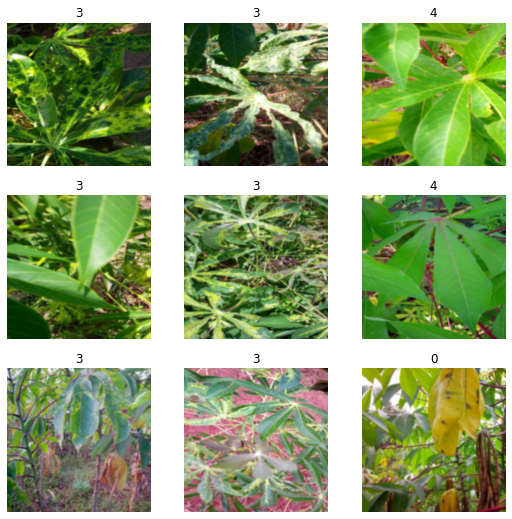

In [12]:
cassava =  DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_x = get_x,
    get_y = get_y,
    splitter=splitter,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=460, min_scale=.75))

dls = cassava.dataloaders(dfx, bs=16)
dls.show_batch()

In [13]:
dls.train.dataset, dls.valid.dataset

((#17118) [(PILImage mode=RGB size=800x600, TensorCategory(0)),(PILImage mode=RGB size=800x600, TensorCategory(3)),(PILImage mode=RGB size=800x600, TensorCategory(1)),(PILImage mode=RGB size=800x600, TensorCategory(1)),(PILImage mode=RGB size=800x600, TensorCategory(3)),(PILImage mode=RGB size=800x600, TensorCategory(3)),(PILImage mode=RGB size=800x600, TensorCategory(2)),(PILImage mode=RGB size=800x600, TensorCategory(0)),(PILImage mode=RGB size=800x600, TensorCategory(4)),(PILImage mode=RGB size=800x600, TensorCategory(3))...],
 (#4279) [(PILImage mode=RGB size=800x600, TensorCategory(1)),(PILImage mode=RGB size=800x600, TensorCategory(3)),(PILImage mode=RGB size=800x600, TensorCategory(3)),(PILImage mode=RGB size=800x600, TensorCategory(3)),(PILImage mode=RGB size=800x600, TensorCategory(4)),(PILImage mode=RGB size=800x600, TensorCategory(3)),(PILImage mode=RGB size=800x600, TensorCategory(3)),(PILImage mode=RGB size=800x600, TensorCategory(4)),(PILImage mode=RGB size=800x600, Tenso

In [14]:
learn = cnn_learner(dls, resnet50, opt_func=ranger, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


/opt/conda/lib/python3.7/site-packages/fastai/callback/schedule.py:270: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(val, idx, 'ro', label=nm, c=color)


SuggestedLRs(valley=0.0063095735386013985)

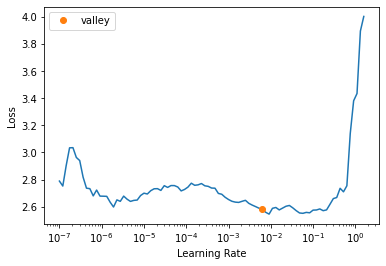

In [15]:
learn.lr_find()

In [16]:
learn.fine_tune(10, base_lr=1e-3)
    # learn.fine_tune_flat(5, base_lr=1e-2, start_pct=0.72, first_callbacks=cbs1, second_callbacks=cbs2)
    # learn.freeze()
    # learn.fit_flat_cos(1, lr=1e-4, cbs=[MixUp()], wd=1)

epoch,train_loss,valid_loss,accuracy,time
0,1.251871,1.041071,0.723767,07:16


epoch,train_loss,valid_loss,accuracy,time
0,0.984427,0.852313,0.801823,08:51
1,0.883386,0.767270,0.831736,08:50
2,0.810606,0.717445,0.851133,08:50
3,0.734293,0.707764,0.860481,08:51
4,0.710815,0.710507,0.853470,08:53
5,0.665550,0.679978,0.872400,08:51
6,0.648859,0.675083,0.875906,08:53
7,0.607928,0.672757,0.874270,08:52
8,0.596317,0.684625,0.873802,08:52
9,0.588507,0.688482,0.872166,08:53


In [2]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

NameError: name 'ClassificationInterpretation' is not defined

In [ ]:
path = Path()
learn.export()
learn = load_learner('export.pkl')

In [ ]:
from IPython.display import FileLink
FileLink('export.pkl')

## Inference

In [ ]:
test_dir =( '../input/cassava-leaf-disease-classification/test_images/')
dfx = pd.read_csv('../input/cassava-leaf-disease-classification/sample_submission.csv')
dfx.head()
# learn.predict(test_dir)

In [ ]:
learn = load_learner('export.pkl')

In [ ]:
dfx['path'] = dfx['image_id'].map(lambda x: os.path.join(test_dir,x))
dfx.drop('image_id', axis=1, inplace=True)
test_dl = learn.dls.test_dl(dfx['path'])

In [ ]:
test_dl.show_batch()

In [ ]:
preds, _ = learn.tta(dl=test_dl)
preds

In [ ]:
label = preds.argmax(axis=1).numpy()

In [ ]:
dfx = pd.read_csv('../input/cassava-leaf-disease-classification/sample_submission.csv')
dfx['label'] = label
dfx

In [ ]:
dfx.to_csv('submission.csv', index=None)